In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
crime=pd.read_csv("Crimeset-street_2023.csv")

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12566 entries, 0 to 12565
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               11055 non-null  object 
 1   Month                  12566 non-null  object 
 2   Reported by            12566 non-null  object 
 3   Falls within           12566 non-null  object 
 4   Longitude              11808 non-null  float64
 5   Latitude               11808 non-null  float64
 6   Location               12566 non-null  object 
 7   LSOA code              11808 non-null  object 
 8   LSOA name              11808 non-null  object 
 9   Crime type             12566 non-null  object 
 10  Last outcome category  11055 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 1.2+ MB


In [8]:
crime.shape

(12566, 12)

In [9]:
crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
2,ab9ed9e3b1aca933e1c34998e0096d337896e18e255680...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
3,fd998d416e135f955bdb4cf4cd0781b0c102a0ddf2160e...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Under investigation,NaN
4,94c4f121096271e4059bcc2200c03e3d54203d89284c16...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Under investigation,NaN


In [10]:
crime.isnull().sum()

Crime ID                  1511
Month                        0
Reported by                  0
Falls within                 0
Longitude                  758
Latitude                   758
Location                     0
LSOA code                  758
LSOA name                  758
Crime type                   0
Last outcome category     1511
Context                  12566
dtype: int64

In [11]:
print(crime.dtypes)

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object


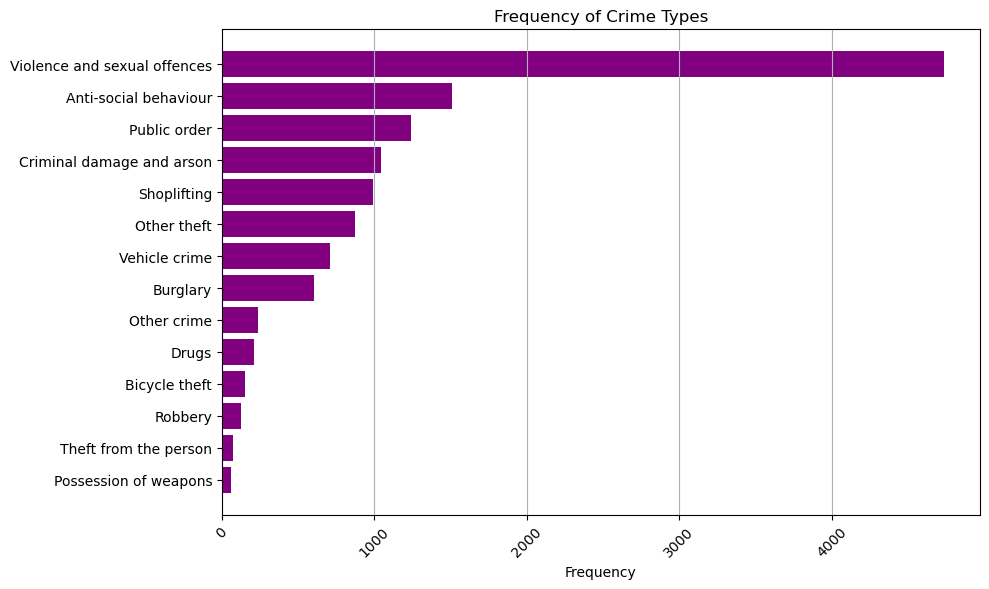

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the crime data
data = {
    "Crime Type": [
        "Violence and sexual offences",
        "Anti-social behaviour",
        "Public order",
        "Criminal damage and arson",
        "Shoplifting",
        "Other theft",
        "Vehicle crime",
        "Burglary",
        "Other crime",
        "Drugs",
        "Bicycle theft",
        "Robbery",
        "Theft from the person",
        "Possession of weapons"
    ],
    "Frequency": [
        4737, 1511, 1239, 1047, 992, 875, 710, 603,
        238, 211, 149, 124, 70, 60
    ]
}

df = pd.DataFrame(data)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(df["Crime Type"], df["Frequency"], color="purple")
plt.xlabel("Frequency")
plt.title("Frequency of Crime Types")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.xticks(rotation=45)
plt.grid(axis="x")

# Show the graph
plt.tight_layout()
plt.show()


In [18]:
print(crime.columns)

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')


In [28]:
crime["Month"] = pd.to_datetime(crime["Month"], format="%Y-%m")

In [12]:
# Load the dataset into "crime" DataFrame
crime = pd.read_csv("Crimeset-street_2023.csv")

# Check if "Month" and "Crime type" columns exist
if "Month" in crime.columns and "Crime type" in crime.columns:
    # Convert "Month" column to datetime format
    crime["Month"] = pd.to_datetime(crime["Month"], format="%Y-%m")
    
    # Group by "Month" and "Crime type", count occurrences, and unstack
    monthly_crimes = crime.groupby(["Month", "Crime type"]).size().unstack(fill_value=0)
    
    # Display the result
    print(monthly_crimes)
else:
    print("Error: Required columns 'Month' or 'Crime type' are missing from the data.")

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Month                                                        
2023-01-01                   1511            149       603   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Month                                                                    
2023-01-01                       1047    211          238          875   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Month                                                                   
2023-01-01                     60          1239      124          992   

Crime type  Theft from the person  Vehicle crime  Violence and sexual offences  
Month                                                                           
2023-01-01                     70            710                          4737  


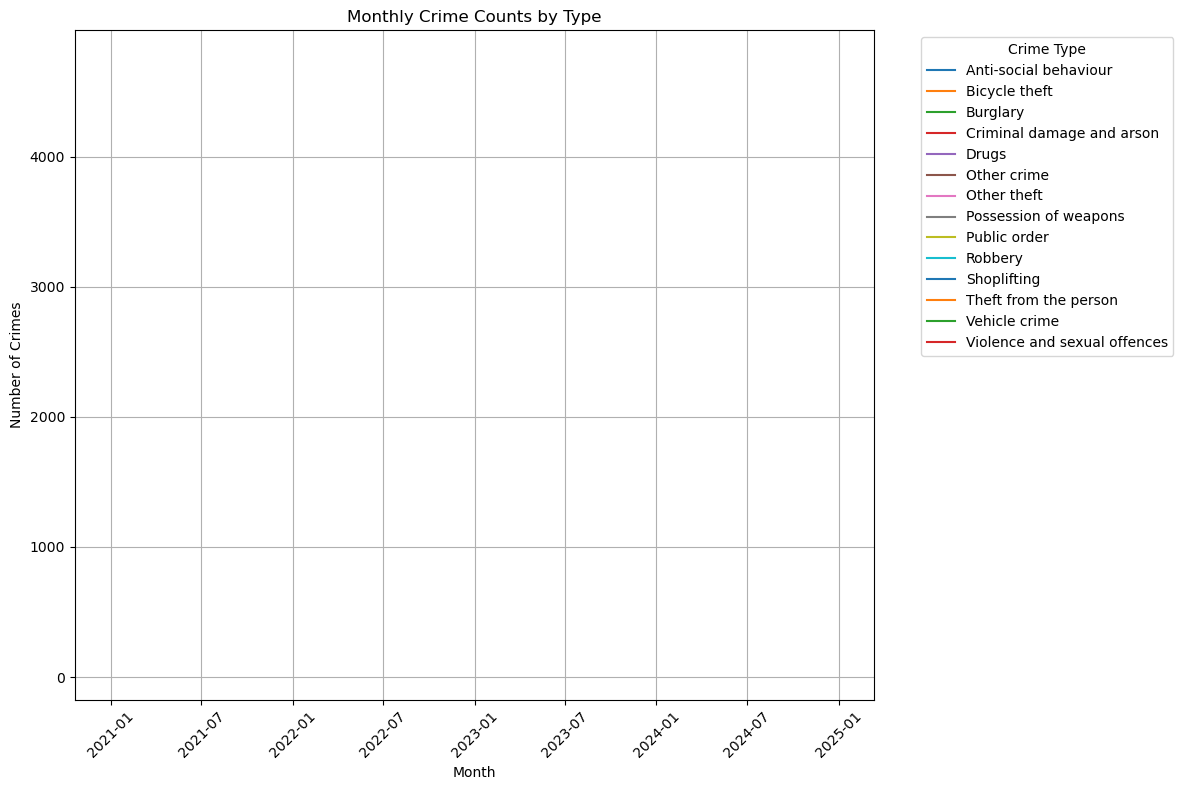

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

crime=pd.read_csv("Crimeset-street_2023.csv")

# Plotting the time series data
plt.figure(figsize=(12, 8))

# Plot each crime type as a separate line
for crime_type in monthly_crimes.columns:
    plt.plot(monthly_crimes.index, monthly_crimes[crime_type], label=crime_type)

plt.title("Monthly Crime Counts by Type")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
crime["Month"] = pd.to_datetime(crime["Month"], format="%Y-%m")

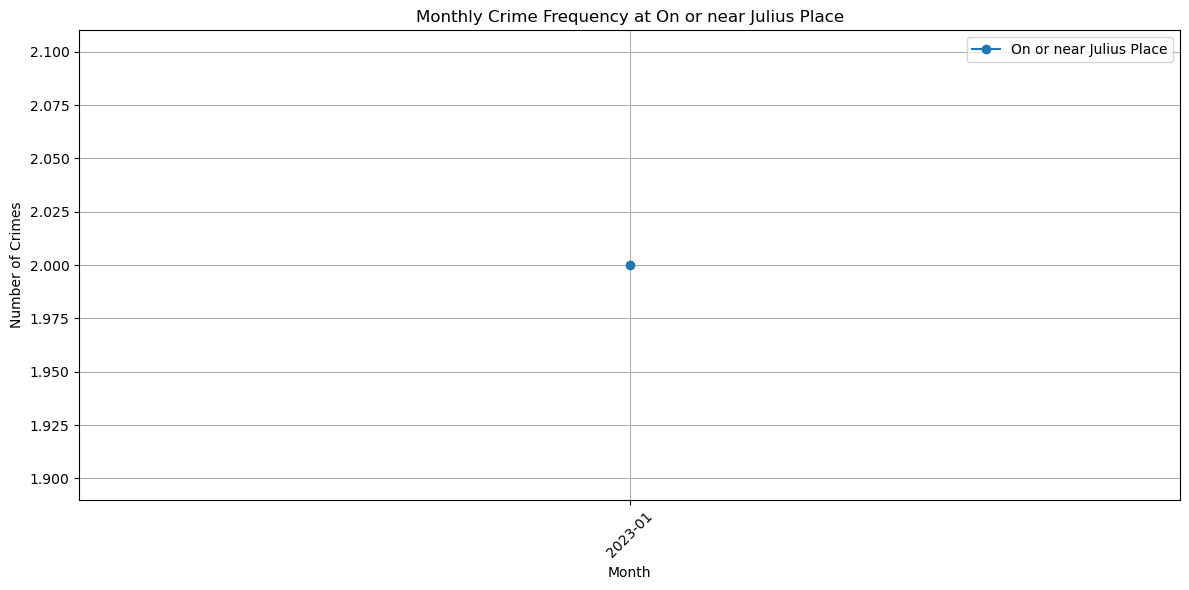

In [51]:
# Load the dataset into "crime" DataFrame
crime = pd.read_csv("Crimeset-street_2023.csv")
# Group by month and location, then count occurrences
monthly_location_crimes = crime.groupby(["Month", "Location"]).size().unstack(fill_value=0)

# Plotting the time series data for a specific location (e.g., "On or near Julius Place")
location_to_plot = "On or near Julius Place"  # Change this to the location of interest

if location_to_plot in monthly_location_crimes.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_location_crimes.index, monthly_location_crimes[location_to_plot], marker="o", label=location_to_plot)
    plt.title(f"Monthly Crime Frequency at {location_to_plot}")
    plt.xlabel("Month")
    plt.ylabel("Number of Crimes")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for the location: {location_to_plot}")

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

crime=pd.read_csv("Crimeset-street_2023.csv")

# Check the first few rows of the dataset to understand its structure
print(crime.head())


                                            Crime ID    Month  \
0                                                NaN  2023-01   
1  cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...  2023-01   
2  ab9ed9e3b1aca933e1c34998e0096d337896e18e255680...  2023-01   
3  fd998d416e135f955bdb4cf4cd0781b0c102a0ddf2160e...  2023-01   
4  94c4f121096271e4059bcc2200c03e3d54203d89284c16...  2023-01   

                      Reported by                    Falls within  Longitude  \
0  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491616   
1  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491616   
2  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491146   
3  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.509285   
4  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.509285   

    Latitude                    Location  LSOA code  \
0  51.424619     On or near Julius Place  E01014399   
1  51.424619     O

                          Location  Frequency
0                      On or near        2053
1                      No Location        758
2           On or near High Street         67
3           On or near West Street         37
4          On or near Station Road         35
...                            ...        ...
4375    On or near Greenfields Way          1
4376  On or near Hildesheim Bridge          1
4377   On or near Woodview Terrace          1
4378          On or near Yeo Close          1
4379         On or near Wood Close          1

[4380 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

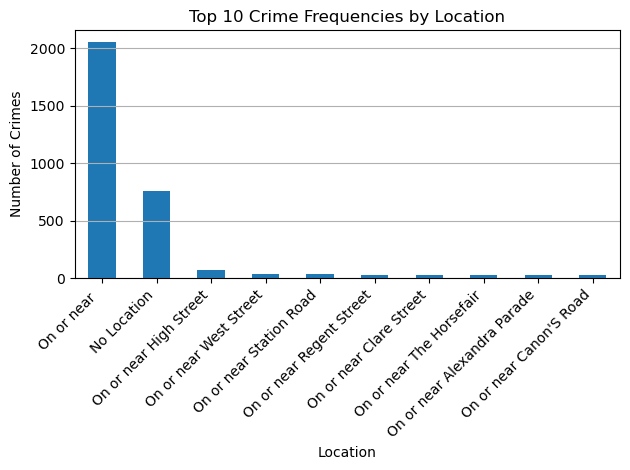

In [71]:
# Group by "Location" and count occurrences of each location
location_frequency = crime["Location"].value_counts()

# Convert the series to a DataFrame for easier manipulation (optional)
location_frequency_df = location_frequency.reset_index()
location_frequency_df.columns = ["Location", "Frequency"]

# Display the frequency of locations
print(location_frequency_df)

# Plotting the frequency of crimes by location
plt.figure(figsize=(12, 6))
location_frequency_df.head(10).plot(kind="bar", x="Location", y="Frequency", legend=False)
plt.title("Top 10 Crime Frequencies by Location")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [55]:
# Display the first few rows of the dataset to understand its structure
print(crime.head())

                                            Crime ID    Month  \
0                                                NaN  2023-01   
1  cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...  2023-01   
2  ab9ed9e3b1aca933e1c34998e0096d337896e18e255680...  2023-01   
3  fd998d416e135f955bdb4cf4cd0781b0c102a0ddf2160e...  2023-01   
4  94c4f121096271e4059bcc2200c03e3d54203d89284c16...  2023-01   

                      Reported by                    Falls within  Longitude  \
0  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491616   
1  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491616   
2  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.491146   
3  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.509285   
4  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.509285   

    Latitude                    Location  LSOA code  \
0  51.424619     On or near Julius Place  E01014399   
1  51.424619     O

In [67]:
import pandas as pd
# Load the dataset
crime = pd.read_csv("Crimeset-street_2023.csv")

In [68]:
# Display the column names to check for the exact name
print(crime.columns)

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')


In [66]:
# Group by "Last outcome category" and count occurrences
outcome_counts= crime["last outcome category"].value_counts()

In [70]:
# Convert the Series to a DataFrame for better display
outcome_counts_df = outcome_counts.reset_index()
outcome_counts_df.columns = ["Last Outcome Category", "Frequency"]

# Display the frequency of each last outcome category
print(outcome_counts_df)

# Optionally, save the results to a CSV file
outcome_counts_df.to_csv("last_outcome_category_frequency.csv", index=False)

                                Last Outcome Category  Frequency
0                                 Under investigation       8277
1                         Unable to prosecute suspect       2107
2                              Awaiting court outcome        251
3   Further investigation is not in the public int...        107
4         Formal action is not in the public interest         95
5       Investigation complete; no suspect identified         92
6                                    Local resolution         39
7        Further action is not in the public interest         34
8          Action to be taken by another organisation         23
9                            Offender given a caution         21
10            Suspect charged as part of another case          9


In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a DataFrame with the provided data
data = {
    "Last Outcome Category": [
        "Under investigation",
        "Unable to prosecute suspect",
        "Awaiting court outcome",
        "Further investigation is not in the public interest",
        "Formal action is not in the public interest",
        "Investigation complete; no suspect identified",
        "Local resolution",
        "Further action is not in the public interest",
        "Action to be taken by another organisation",
        "Offender given a caution",
        "Suspect charged as part of another case"
    ],
    "Frequency": [
        8277,
        2107,
        251,
        107,
        95,
        92,
        39,
        34,
        23,
        21,
        9
    ]
}

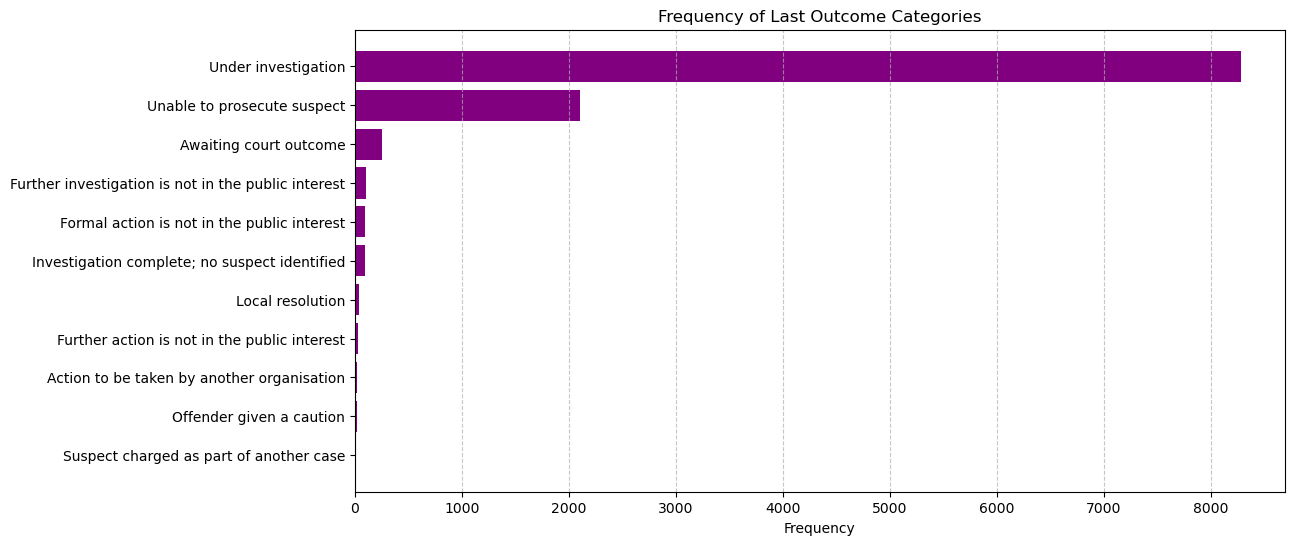

In [79]:
# Creating a DataFrame
crime = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(crime["Last Outcome Category"], crime["Frequency"], color="purple")
plt.xlabel("Frequency")
plt.title("Frequency of Last Outcome Categories")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [84]:
# Sample synthetic dataset creation 
# Assuming you have some features related to crime that you would use for classification
np.random.seed(0)

# Synthetic features
n_samples = 1000
X = pd.DataFrame({
    'feature1': np.random.rand(n_samples),  
    'feature2': np.random.rand(n_samples)   # Replace with your actual feature
})

# Synthetic target variable (Last Outcome Category)
y = np.random.choice(
    ["Under investigation", "Unable to prosecute suspect", "Awaiting court outcome"],
    size=n_samples
)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model definition
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Cross-validation on the best estimator
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validation scores: [0.3125  0.39375 0.35    0.3625  0.36875]
Mean CV Score: 0.35750000000000004
Classification Report:
                              precision    recall  f1-score   support

     Awaiting court outcome       0.28      0.34      0.31        61
Unable to prosecute suspect       0.37      0.26      0.30        74
        Under investigation       0.33      0.38      0.36        65

                   accuracy                           0.33       200
                  macro avg       0.33      0.33      0.32       200
               weighted avg       0.33      0.33      0.32       200

Confusion Matrix:
 [[21 16 24]
 [29 19 26]
 [24 16 25]]


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [14]:
# Sample data - replace with your actual dataset
data = {
    "Last Outcome Category": [
        "Under investigation", "Unable to prosecute suspect",
        "Awaiting court outcome", "Under investigation",
        "Unable to prosecute suspect", "Awaiting court outcome"
    ],
    'Frequency': [8277, 2107, 251, 8277, 2107, 251]
}

In [15]:

# Create a DataFrame
df = pd.DataFrame(data)

# Preprocess the data
# Encoding the categorical variable
label_encoder = LabelEncoder()
df["Last Outcome Category"] = label_encoder.fit_transform(df["Last Outcome Category"])

# Features and target variable
X = df[["Frequency"]]
y = df["Last Outcome Category"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
results = {}

# Use stratified K-Folds to maintain the distribution of classes
skf = StratifiedKFold(n_splits=min(5, y.value_counts().min()), shuffle=True, random_state=42)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=skf)

    results[model_name] = {
        "Accuracy": accuracy,
        "Mean CV Score": np.mean(cv_scores),
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Mean CV Score: {metrics['Mean CV Score']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Model: Random Forest
Accuracy: 1.0000
Mean CV Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[1 0]
 [0 1]]

Model: Logistic Regression
Accuracy: 1.0000
Mean CV Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[1 0]
 [0 1]]

Model: Support Vector Machine
Accuracy: 0.5000
Mean CV Score: 1.0000
Classification Report:
              

C:\Users\eroja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eroja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eroja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eroja\anaconda3\Lib\site-packages\sklea